## FISH CATCHES IN IRELAND AND IN COMPARISIM TO OTHER E.U COUNTRIES


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [2]:
df=pd.read_csv('fish_capture.csv')

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Capture fisheries production (metric tons),ER.FSH.CAPT.MT,200.0,200.0,300.0,300.0,300.0,300.0,...,138.00,145.00,152.00,150.00,150.00,149.00,149.00,163.00,155.00,NaN
1,Africa Eastern and Southern,AFE,Capture fisheries production (metric tons),ER.FSH.CAPT.MT,1485740.0,1632169.0,1735664.0,1848486.0,2164132.0,2174850.0,...,3823494.99,3701198.31,3927435.12,4033890.26,4188878.44,4210226.37,4149011.16,4220081.72,4192288.05,NaN
2,Afghanistan,AFG,Capture fisheries production (metric tons),ER.FSH.CAPT.MT,200.0,300.0,300.0,300.0,300.0,300.0,...,1300.00,1450.00,1600.00,1750.00,1900.00,2000.00,2050.00,2100.00,2000.00,NaN
3,Africa Western and Central,AFW,Capture fisheries production (metric tons),ER.FSH.CAPT.MT,488505.0,513837.0,560769.0,582503.0,646740.0,680876.0,...,3112164.29,3172804.04,3221896.54,3156916.84,3473352.32,4126363.57,4230596.86,4015509.77,3855653.10,NaN
4,Angola,AGO,Capture fisheries production (metric tons),ER.FSH.CAPT.MT,257300.0,246800.0,274800.0,245300.0,362000.0,263300.0,...,374000.00,407000.00,442084.00,495232.00,486490.00,531575.00,443066.00,400762.00,377345.00,NaN


In [4]:
#changing date columns to rows
df=df.melt(id_vars=["Country Name", "Country Code",'Indicator Name','Indicator Code'], 
        var_name="Date", 
        value_name="captured fishes (metric tons)")


In [5]:
#dropping columns
df= df.drop(columns= ['Indicator Name', 'Indicator Code'])

In [6]:
#checking for duplicate rows
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 4)


In [7]:
#checking for null values
print(df.isnull().sum())

Country Name                        0
Country Code                        0
Date                                0
captured fishes (metric tons)    1851
dtype: int64


In [8]:
#dropping null values
df = df.dropna()

In [9]:
df.head()

,Country Name,Country Code,Date,captured fishes (metric tons)
0,Aruba,ABW,1960,200.0
1,Africa Eastern and Southern,AFE,1960,1485740.0
2,Afghanistan,AFG,1960,200.0
3,Africa Western and Central,AFW,1960,488505.0
4,Angola,AGO,1960,257300.0





## DATA FOR THE E.U

In [10]:
# Create a dataframe with only the rows for the specified EU countries and 
#sort it in ascending order by country name and date

df_eu = (df.apply(lambda row: row[df['Country Name'].isin
        (['Austria', 'Belgium', 'Bulgaria', 'Croatia','Cyprus', 'Czech Republic', 
          'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
          'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
          'Slovakia', 'Slovenia', 'Spain', 'Sweden'])])).sort_values(by=['Country Name','Date'], ascending=True)

# Print the first 5 rows of the resulting dataframe
df_eu.head()


,Country Name,Country Code,Date,captured fishes (metric tons)
14,Austria,AUT,1960,3550.0
280,Austria,AUT,1961,3540.0
546,Austria,AUT,1962,3830.0
812,Austria,AUT,1963,4000.0
1078,Austria,AUT,1964,4220.0


In [11]:
#descriptive statistics of dataframe
df_eu.describe().apply(lambda x: int(x), axis=1)

count       1377
mean      269246
std       371072
min          263
25%         9336
50%       135467
75%       348441
max      2013518
dtype: int64

# STATISTICS

##### CHECKING THE NORMALITY OF THE DATA

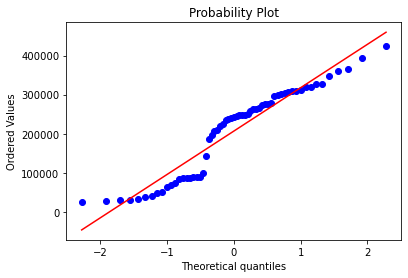

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Select the column of interest from the dataframe
data = df_eu[df_eu['Country Name'] == 'Ireland']['captured fishes (metric tons)']

# Create the Q-Q plot
stats.probplot(data, plot=plt)

# Show the plot
plt.show()



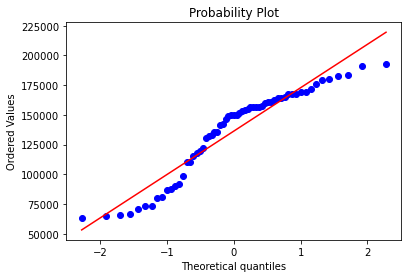

In [13]:
# Select the column of interest from the dataframe
data = df_eu[df_eu['Country Name'] == 'Finland']['captured fishes (metric tons)']

# Create the Q-Q plot
stats.probplot(data, plot=plt)

# Show the plot
plt.show()



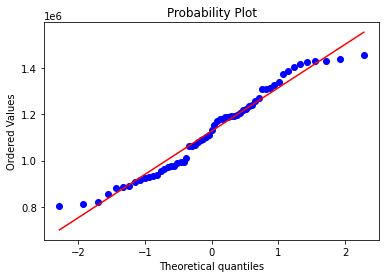

In [14]:
# Select the column of interest from the dataframe
data = df_eu[df_eu['Country Name'] == 'Spain']['captured fishes (metric tons)']

# Create the Q-Q plot
stats.probplot(data, plot=plt)

# Show the plot
plt.show()


In [15]:
from scipy.stats import shapiro

def test_normality(df, country_name):
    data = df_eu[df_eu['Country Name'] == country_name]['captured fishes (metric tons)']
    stat, p = shapiro(data)
    alpha = 0.05
    if p > alpha:
        print(f"Cannot reject the null hypothesis of normality for {country_name}")
    else:
        print(f"Reject the null hypothesis of normality for {country_name}")
    print(f"p-value: {p:.3f}")
    print(f"Test Statistic: {stat:.3f}")


In [16]:
test_normality(df_eu, 'Ireland')

Reject the null hypothesis of normality for Ireland
p-value: 0.000
Test Statistic: 0.914


In [17]:
test_normality(df_eu, 'Spain')

Reject the null hypothesis of normality for Spain
p-value: 0.037
Test Statistic: 0.958


In [18]:
test_normality(df_eu, 'Finland')

Reject the null hypothesis of normality for Finland
p-value: 0.000
Test Statistic: 0.909


In [19]:
test_normality(df_eu, 'Italy')

Reject the null hypothesis of normality for Italy
p-value: 0.011
Test Statistic: 0.947


In [20]:
test_normality(df_eu, 'Lithuania')

Reject the null hypothesis of normality for Lithuania
p-value: 0.000
Test Statistic: 0.764


In [21]:
test_normality(df_eu, 'Bulgaria')

Reject the null hypothesis of normality for Bulgaria
p-value: 0.000
Test Statistic: 0.778


In [22]:
test_normality(df_eu,  'Denmark')

Reject the null hypothesis of normality for Denmark
p-value: 0.000
Test Statistic: 0.894


In [23]:
test_normality(df_eu,  'Sweden')

Reject the null hypothesis of normality for Sweden
p-value: 0.006
Test Statistic: 0.943


###### average fish capture in ireland is greater than the average fish capture in spain and finland

## Kruskal

In [24]:
# Create dataframe
data = df_eu[df_eu['Country Name'] == 'Ireland']
# Select data for Ireland, Spain, and Finland
ireland = data[data['Country Name'] == 'Ireland']['captured fishes (metric tons)']
spain = data[data['Country Name'] == 'Spain']['captured fishes (metric tons)']
finland = data[data['Country Name'] == 'Finland']['captured fishes (metric tons)']

# Perform Kruskal-Wallis H-test
stat, p = stats.kruskal(ireland, spain, finland)
print(f'Test statistic: {stat}, p-value: {p}')

# Interpret the results
alpha = 0.05  # significance level
if p > alpha:
    print('There is no significant difference (fail to reject H0)')
else:
    print('There is a significant difference (reject H0)')


Test statistic: nan, p-value: nan
There is a significant difference (reject H0)


###### The friedmanchisquare function from the scipy.stats module requires that the input arrays have the same length, because the samples are assumed to be paired. If the arrays have different lengths, the function will raise a ValueError with the message "Unequal N in friedmanchisquare. Aborting."

To fix this error, you can check the lengths of the arrays and make sure that they are equal. If they are not equal, you can either remove the extra values from the longer arrays, or you can pad the shorter arrays with missing values (e.g., np.nan for numeric arrays or None for object arrays).

In [25]:
import numpy as np
from scipy.stats import friedmanchisquare

# Assume that the arrays `ireland`, `spain`, and `finland` have already been defined

# Check the lengths of the arrays
len_ireland = len(ireland)
len_spain = len(spain)
len_finland = len(finland)

# Find the length of the longest array
max_len = max(len_ireland, len_spain, len_finland)

# Pad the shorter arrays with missing values
if len_ireland < max_len:
    ireland = np.pad(ireland, (0, max_len - len_ireland), 'constant', constant_values=np.nan)
if len_spain < max_len:
    spain = np.pad(spain, (0, max_len - len_spain), 'constant', constant_values=np.nan)
if len_finland < max_len:
    finland = np.pad(finland, (0, max_len - len_finland), 'constant', constant_values=np.nan)

# Perform Friedman test
stat, p = friedmanchisquare(ireland, spain, finland)
print(f'Test statistic: {stat}, p-value: {p}')

# Interpret the results
alpha = 0.05  # significance level
if p > alpha:
    print('There is no significant difference (fail to reject H0)')
else:
    print('There is a significant difference (reject H0)')


Test statistic: 122.0, p-value: 3.2213402859925253e-27
There is a significant difference (reject H0)


This code will perform a Wilcoxon rank-sum test to compare the median capture fish (in metric tons) for Ireland and Spain. The test statistic and p-value are calculated using the ranksums() function from the scipy.stats module. The p-value is then compared to the significance level (alpha) of 0.05 to determine whether there is a significant difference between the medians. If the p-value is less than alpha, it suggests that the medians are significantly different and the null hypothesis (H0) can be rejected. If the p-value is greater than alpha, it suggests that the medians are not significantly different and the null hypothesis cannot be rejected.

Test statistic: -9.52659947520497, p-value: 1.625196367600529e-21
There is a significant difference (reject H0)


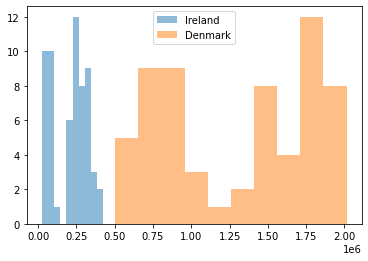

In [26]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create dataframe
data = df_eu[df_eu['Country Name'].isin(['Ireland', 'Denmark'])]

# Select data for Ireland and Denmark
ireland = data[data['Country Name'] == 'Ireland']['captured fishes (metric tons)']
denmark = data[data['Country Name'] == 'Denmark']['captured fishes (metric tons)']

# Perform Wilcoxon rank-sum test
stat, p = stats.ranksums(ireland, denmark)
print(f'Test statistic: {stat}, p-value: {p}')

# Interpret the results
alpha = 0.05  # significance level
if p > alpha:
    print('There is no significant difference (fail to reject H0)')
else:
    print('There is a significant difference (reject H0)')

# Plot data
plt.hist(ireland, alpha=0.5, label='Ireland')
plt.hist(denmark, alpha=0.5, label='Denmark')
plt.legend()
plt.show()



To perform a Mann-Whitney U test (also known as a Wilcoxon rank-sum test) comparing the median captured fish (in metric tons) for Ireland and Denmark, you can use the following code:

Test statistic: 1489.0, p-value: 0.05747415499305959
There is no significant difference (fail to reject H0)


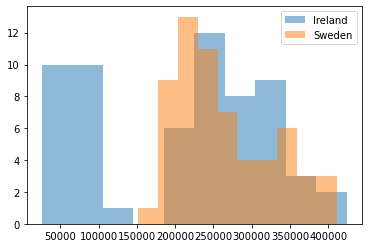

In [27]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create dataframe
data = df_eu[df_eu['Country Name'].isin(['Ireland', 'Sweden'])]

# Select data for Ireland and Denmark
ireland = data[data['Country Name'] == 'Ireland']['captured fishes (metric tons)']
denmark = data[data['Country Name'] == 'Sweden']['captured fishes (metric tons)']

# Perform Mann-Whitney U test
stat, p = stats.mannwhitneyu(ireland, denmark)
print(f'Test statistic: {stat}, p-value: {p}')

# Interpret the results
alpha = 0.05  # significance level
if p > alpha:
    print('There is no significant difference (fail to reject H0)')
else:
    print('There is a significant difference (reject H0)')

# Plot data
plt.hist(ireland, alpha=0.5, label='Ireland')
plt.hist(denmark, alpha=0.5, label='Sweden')
plt.legend()
plt.show()


In [28]:
# Create dataframe
data = df_eu[df_eu['Country Name'].isin(['Ireland', 'Italy'])]

# Create contingency table
ct = pd.crosstab(data['Country Name'], data['captured fishes (metric tons)'])
print(ct)

# Perform chi-square test
stat, p, dof, expected = stats.chi2_contingency(ct)
print(f'Test statistic: {stat}, p-value: {p}')

# Interpret the results
alpha = 0.05  # significance level
if p > alpha:
    print('There is no significant association (fail to reject H0)')
else:
    print('There is a significant association (reject H0)')


captured fishes (metric tons)  26500.00   28500.00   30900.00   31200.00   \
Country Name                                                                
Ireland                                1          1          1          1   
Italy                                  0          0          0          0   

captured fishes (metric tons)  34600.00   38800.00   40700.00   48900.00   \
Country Name                                                                
Ireland                                1          1          1          1   
Italy                                  0          0          0          0   

captured fishes (metric tons)  50500.00   63500.00   ...  426700.00  \
Country Name                                         ...              
Ireland                                1          1  ...          0   
Italy                                  0          0  ...          1   

captured fishes (metric tons)  430152.09  430265.50  439227.38  443729.68  \
Country Name        

# VIRTUALIZATION

In [29]:
#Line graph to show the trend of captured fishes in ireland from 1960-2020
#geo virtualisation to show ireland compared to other E.U countries
#histogram to show the average number of fish captures in E.U countries from 1960-2020

In [ ]:
import plotly.express as px

In [ ]:
# Filter the dataframe to include only rows for Ireland
df_ireland = df_eu[df_eu['Country Name'] == 'Ireland']
# Create the line chart
fig = px.line(df_ireland, x='Date', y='captured fishes (metric tons)', title='Captured Fishes in Ireland')
# Set the gridline color
fig.update_layout(
    xaxis=dict(
        showgrid=True,
        gridcolor='#bdbdbd'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='#bdbdbd'
    )
)


fig.show()



In [ ]:
 

custom_color_scale = ['#FF0000', '#FFFF00', '#00FF00']

fig = px.choropleth(df_eu,
                    locations='Country Code',
                    color='captured fishes (metric tons)',
                    hover_name='Country Name',
                    animation_frame='Date',
                    title='Captured Fishes by Country',
                    height=900,
                    color_continuous_scale=custom_color_scale)

fig.update_layout(title_text= "Fish Catches In E.U Countries",
                  geo_scope='europe')
fig.show()



## THE TOTAL AVERAGE OF FISH CATCHES FOR E.U COUNTRIES FROM 1960-2020

In [ ]:
# Group the data by country
df_grouped = df_eu.groupby(['Country Name'])

# Calculate the average for each group
df_averages = df_grouped['captured fishes (metric tons)'].mean()

# Round the values in the 'captured fishes (metric tons)' column to the nearest integer
df_averages = df_averages.round()

# Reset the index to make the country column a regular column
df_averages = df_averages.reset_index()

# Print the resulting dataframe
print(df_averages)


In [ ]:
fig = px.histogram(df_averages, x='Country Name', y='captured fishes (metric tons)', title='Average Captured Fishes (Metric Tons) in all E.U countries 1960-2020')
fig.show()


# DASHBOARD

In [ ]:
#USING THE GEODATA MAP TO CREATE A WEB DASHBOARD

In [ ]:
#pip install dash

In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [ ]:
app = dash.Dash()

# Get a list of all the countries in the dataframe
countries = df_eu['Country Name'].unique()

app.layout = html.Div([
    # Dropdown menu for selecting countries
    dcc.Dropdown(
        id='countries-dropdown',
        options=[{'label': c, 'value': c} for c in countries],
        multi=True,
        value=['Ireland', 'Germany']
    ),
    # Choropleth map
    dcc.Graph(
        id='choropleth-map'
    )
])

@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('countries-dropdown', 'value')]
)
def update_map(selected_countries):
    # Filter the dataframe by the selected countries
    df_filtered = df_eu[df_eu['Country Name'].isin(selected_countries)]
    
    # Create the figure with the filtered data
    fig = px.choropleth(df_filtered,
                        locations='Country Code',
                        color='captured fishes (metric tons)',
                        hover_name='Country Name',
                        animation_frame='Date',
                        title='Captured Fishes by Country',
                        height=900,
                        color_continuous_scale=custom_color_scale)

    fig.update_layout(title_text= "Fish Catches In E.U Countries",
                      geo_scope='europe')
    return fig

if __name__ == '__main__':
#    app.run_server()


# SENTIMENT ANALYSIS

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Commercial fishing Aquaculture since:2019-01-05 until:2022-07-06').get_items()):
    if i>200:
        break
    attributes_container.append([ tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=[ "Tweets"])

In [ ]:
tweets_df.head(10)

In [ ]:
import re

def remove_special_characters(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove numbers
    text = ''.join([word for word in text if word.isalpha()])
    
    return text


In [ ]:
import nltk

def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens


In [ ]:
import nltk
from nltk.corpus import stopwords

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens


In [ ]:
import nltk
from nltk.stem import PorterStemmer

def stem_words(tokens):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return stemmed_words


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_words


In [ ]:
tweets_df.head(10)